# 1. Open Exploration with 17 Objectives Base Case

## 1.1 Introduction

17 Objectives, no policy

In [130]:
# load library

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [12]:
# no policy base case

from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

dike_model, planning_steps = get_model_for_problem_formulation(5)

policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]


In [14]:
tic = time.time()

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=policies)

toc = time.time()

print('Total run time:{} min'.format((toc - tic)/60))

# Save the results
utilities.save_results(results, 'results/base_case_without_policy.csv')


Total run time:0.0 min


[MainProcess/INFO] results saved successfully to C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


In [28]:
base_results = utilities.load_results('results/base_case_without_policy.csv')

experiments, outcomes = base_results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)

results = experiments.join(outcomes)
results = results.drop(columns="model")
results

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,62.0,84.997178,1.0,0.957652,302.697759,1.0,0.712827,133.589414,1.0,0.238457,...,0,0.662632,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,3.0,345.623637,1.0,0.483549,166.050246,10.0,0.286214,79.130315,1.5,0.080464,...,0,1.092732,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,130.0,193.012997,1.5,0.653016,224.624180,10.0,0.349210,217.541726,1.5,0.063713,...,0,1.077036,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
3,6.0,115.440169,1.0,0.696211,183.928033,10.0,0.841538,153.686659,10.0,0.919403,...,0,0.023142,2.423024e+06,0,0.001621,3.321234e+07,0,0.037189,0.0,0.0
4,30.0,346.490014,1.0,0.441742,294.524107,1.0,0.485913,313.654161,1.5,0.915752,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27.0,231.934052,1.0,0.896620,269.749043,10.0,0.410018,260.800822,1.0,0.638854,...,0,0.004116,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
996,101.0,326.634235,1.5,0.384356,218.039156,10.0,0.453245,296.384211,1.0,0.581751,...,0,0.000000,0.000000e+00,0,0.000000,1.078552e+08,0,0.068980,0.0,0.0
997,130.0,330.657857,1.5,0.744546,255.491556,1.5,0.202691,167.968988,10.0,0.161231,...,0,0.829496,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
998,113.0,347.754397,1.5,0.699881,57.640404,1.5,0.561584,205.719905,1.0,0.344590,...,0,0.286528,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [48]:
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

Time step:0, Expected Annual Damage of each dike


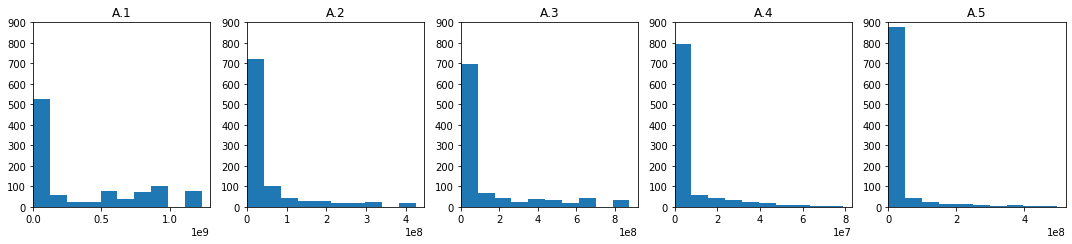

Time step:1, Expected Annual Damage of each dike


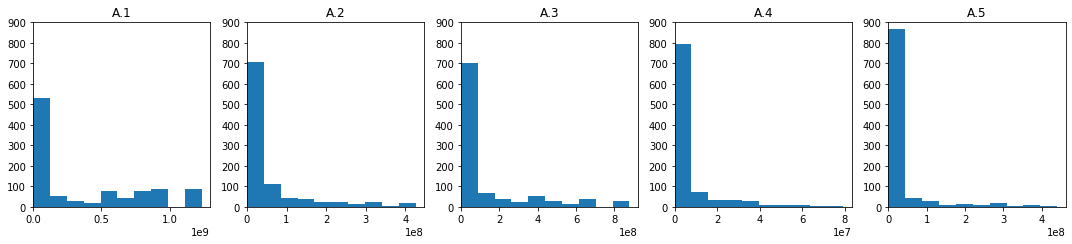

Time step:2, Expected Annual Damage of each dike


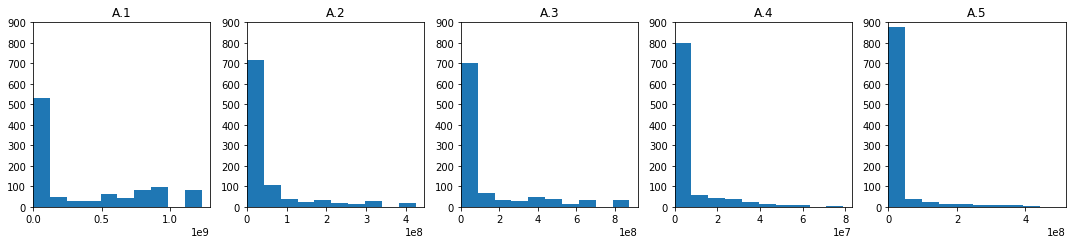

In [50]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Annual Damage of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Annual Damage "+str(n)] )
        a.set_xlim(left=0)
        a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

Time step:0, Expected Number of Deaths of each dike


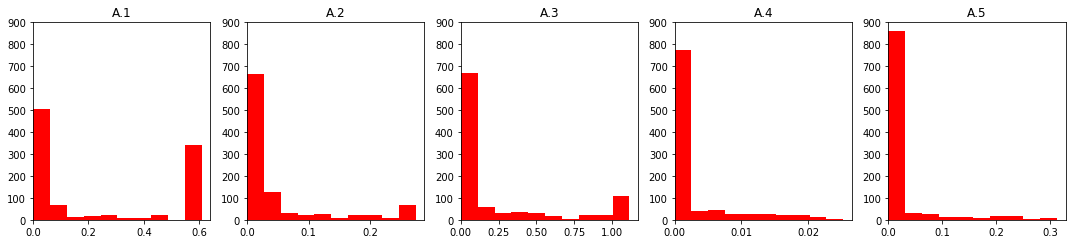

Time step:1, Expected Number of Deaths of each dike


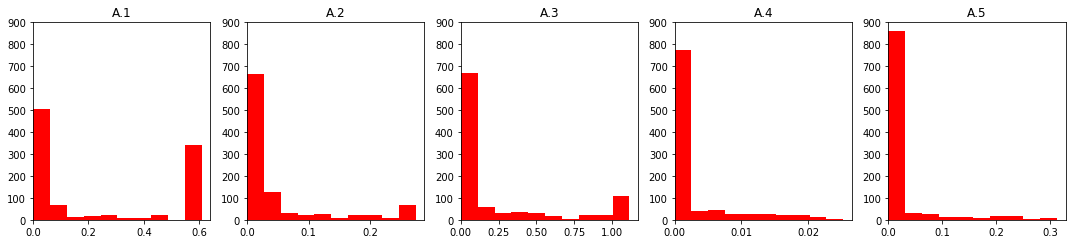

Time step:2, Expected Number of Deaths of each dike


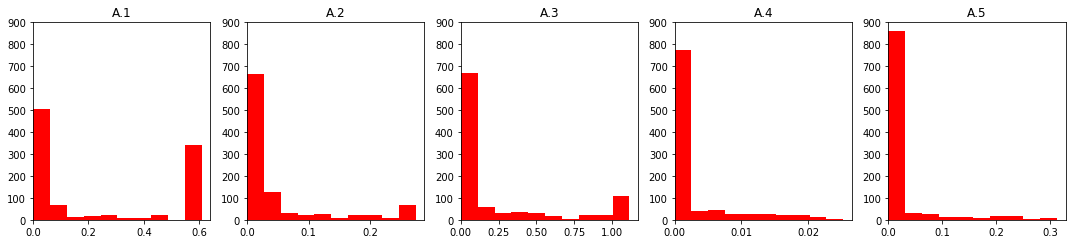

In [51]:
for n in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

    print("Time step:" + str(n) + ", Expected Number of Deaths of each dike")
    
    for (i, a) in zip(dike_lists, axes.flatten()):
        a.hist(results[str(i) + "_Expected Number of Deaths "+str(n)] , color = 'red')
        a.set_xlim(left=0)
        a.set_ylim([0,900])
        a.set_title(i)


    plt.tight_layout()
    plt.show()

[355125182.61733544, 50715999.84645771, 132122001.79553422, 5888394.024567844, 23066239.240156006]
[356677389.3222748, 51322983.844300754, 128138638.57111664, 5914134.02125824, 23620981.79066198]
[355922400.5782887, 51594901.78099206, 130599565.90792029, 5724818.063779456, 22971501.38923983]


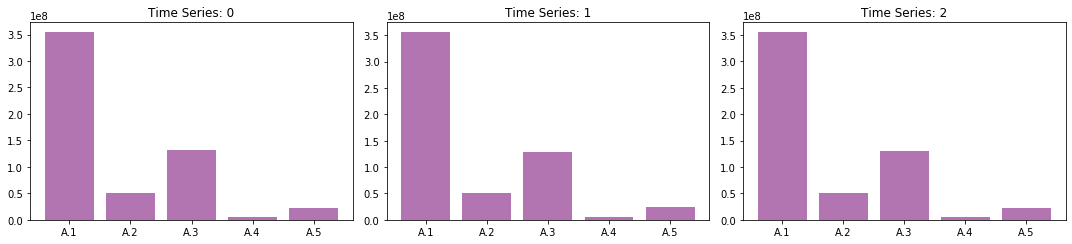

In [125]:
#mean value of expected annual damage of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = (0.5,0.1,0.5,0.6))
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]
[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]
[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]


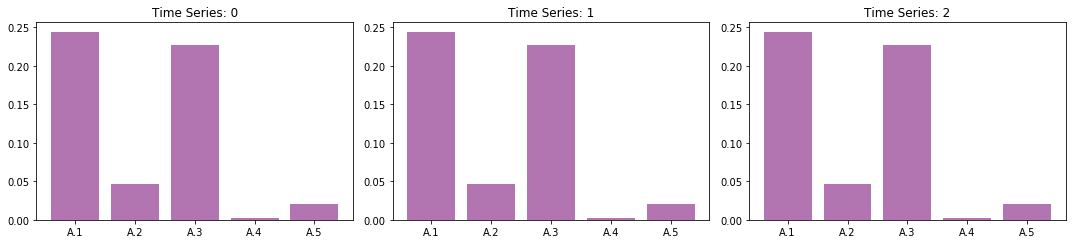

In [126]:
#mean value of Expected Number of Deaths of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 3.5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = (0.5,0.1,0.5,0.6))
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


In [134]:
#total demage calculate
damage_column=[]
death_column=[]

for c in results.columns:
    if "Expected Annual Damage" in c:
        damage_column.append(c)

for c in results.columns:
    if "Expected Number of Deaths" in c:
        death_column.append(c)

results["Total Expected Annual Damage"] = results[damage_column].sum(axis=1)
results["Total Expected Number of Deaths"] = results[death_column].sum(axis=1)

In [139]:
total_damage_75 = results["Total Expected Annual Damage"].quantile(0.75)
total_death_75 = results["Total Expected Number of Deaths"].quantile(0.75)

2.0563665613984945

In [140]:
x = results.iloc[:, :19]  # Only take the uncertainties

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths > total_death_75

[MainProcess/INFO] 1000 points remaining, containing 250 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.117, coverage: 0.468, density: 1.0 restricted_dimensions: 3


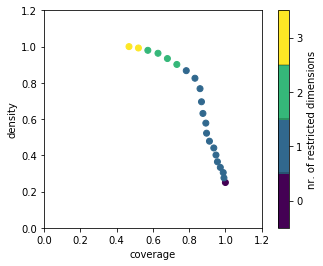

In [144]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [145]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000,0.250000,0,1.000,0.250000,0
1,0.992,0.275556,1,0.900,0.275556,1
2,0.988,0.304938,2,0.810,0.304938,1
3,0.972,0.333333,3,0.729,0.333333,1
4,0.956,0.364329,4,0.656,0.364329,1
5,0.948,0.401695,5,0.590,0.401695,1
6,0.936,0.440678,6,0.531,0.440678,1
7,0.912,0.477987,7,0.477,0.477987,1
8,0.896,0.522145,8,0.429,0.522145,1
9,0.892,0.577720,9,0.386,0.577720,1


coverage    0.468
density         1
id             20
mass        0.117
mean            1
res_dim         3
Name: 20, dtype: object

             box 20                                         
                min       max                      qp values
A.3_pfail  0.000556  0.202000  [-1.0, 6.860566314629209e-73]
A.1_pfail  0.313678  0.999652  [7.544630907671271e-07, -1.0]
A.2_pfail  0.114336  0.999462    [0.16529301951782518, -1.0]



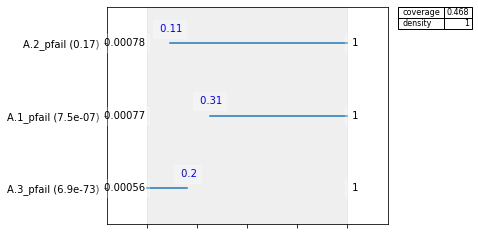

In [146]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

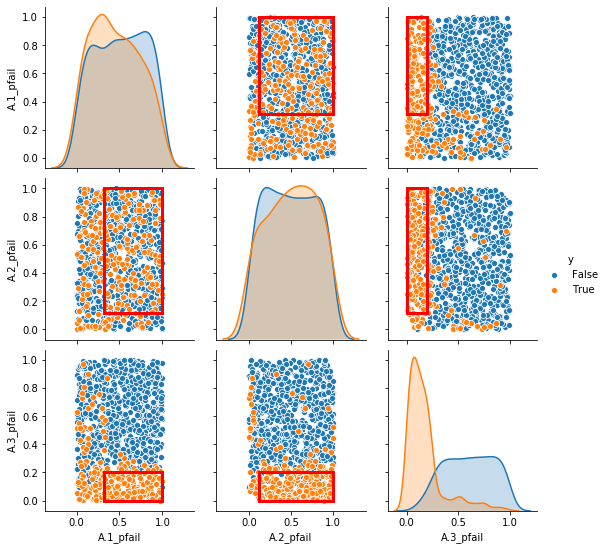

In [147]:
box1.select(-1)
box1.show_pairs_scatter()
plt.show()

In [ ]:
dike_model, planning_steps = get_model_for_problem_formulation(5)

policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]


In [156]:
tic = time.time()

#with MultiprocessingEvaluator(dike_model) as evaluator:
#    results_75 = evaluator.perform_experiments(scenarios=1000, policies=75)
#
toc = time.time()

print('Total run time:{} min'.format((toc - tic)/60))

# Save the results
utilities.save_results(results_75, 'results/base_case_75.csv')


Total run time:0.0 min


[MainProcess/INFO] results saved successfully to C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_75.csv


In [157]:
results_75 = utilities.load_results('results/base_case_75.csv')

experiments_2, outcomes_2 = results_75
outcomes_2 = pd.DataFrame(outcomes_2)
experiments_2 = pd.DataFrame(experiments_2)

results_2 = experiments.join(outcomes_2)
experiments_2

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_75.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,22.0,316.720229,1.5,0.508918,179.556360,1.0,0.056675,161.786225,1.0,0.411000,...,9.0,3.0,10.0,5.0,10.0,10.0,4.0,2000,2,dikesnet
1,37.0,48.449390,1.5,0.726517,71.388513,1.0,0.316716,140.869331,10.0,0.288527,...,9.0,3.0,10.0,5.0,10.0,10.0,4.0,2001,2,dikesnet
2,116.0,342.466577,1.5,0.696968,164.240184,10.0,0.070253,241.641985,10.0,0.701739,...,9.0,3.0,10.0,5.0,10.0,10.0,4.0,2002,2,dikesnet
3,131.0,317.750054,10.0,0.514734,41.084696,10.0,0.670645,172.060501,1.5,0.002929,...,9.0,3.0,10.0,5.0,10.0,10.0,4.0,2003,2,dikesnet
4,69.0,134.031006,1.0,0.056991,141.114722,10.0,0.138095,275.399627,1.0,0.807559,...,9.0,3.0,10.0,5.0,10.0,10.0,4.0,2004,2,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,23.0,151.955766,10.0,0.943525,149.089915,1.5,0.594206,270.182770,1.5,0.089715,...,3.0,5.0,10.0,10.0,5.0,4.0,4.0,2995,76,dikesnet
74996,39.0,224.496227,1.0,0.390712,243.949795,1.0,0.090980,310.542851,1.5,0.569246,...,3.0,5.0,10.0,10.0,5.0,4.0,4.0,2996,76,dikesnet
74997,45.0,347.284444,1.0,0.687342,59.820104,1.0,0.659417,229.083131,1.0,0.643934,...,3.0,5.0,10.0,10.0,5.0,4.0,4.0,2997,76,dikesnet
74998,124.0,106.585076,1.0,0.434781,132.822331,10.0,0.266128,170.757239,10.0,0.151776,...,3.0,5.0,10.0,10.0,5.0,4.0,4.0,2998,76,dikesnet
